# Data Set Info and Background

Author: Alvin Yap

Project Goal: Clean up the unnormalized data

Data Set: http://archive.ics.uci.edu/ml/datasets/communities+and+crime+unnormalized

Information Of Data Set:

Data Set Characteristics: Multivariate

Associated Tasks:Data Cleaning + Analysis

Number of Instances:2215

Number of Attributes: 147

Area: Social

Description of Data Set:
The source datasets needed to be combined via programming. Many variables are included so that algorithms that select or learn weights for attributes could be tested. However, clearly unrelated attributes were not included; attributes were picked if there was any plausible connection to crime (N=125), plus the crime variables which are potential dependent variables. The variables included in the dataset involve the community, such as the percent of the population considered urban, and the median family income, and involving law enforcement, such as per capita number of police officers, and percent of officers assigned to drug units. The crime attributes (N=18) that could be predicted are the 8 crimes considered 'Index Crimes' by the FBI)(Murders, Rape, Robbery, .... ), per capita (actually per 100,000 population) versions of each, and Per Capita Violent Crimes and Per Capita Nonviolent Crimes).
A limitation was that the LEMAS survey was of the police departments with at least 100 officers, plus a random sample of smaller departments. For our purposes, communities not found in both census and crime datasets were omitted. Many communities are missing LEMAS data.

The per capita crimes variables were calculated using population values included in the 1995 FBI data (which differ from the 1990 Census values).

The per capita violent crimes variable was calculated using population and the sum of crime variables considered violent crimes in the United States: murder, rape, robbery, and assault. There was apparently some controversy in some states concerning the counting of rapes. These resulted in missing values for rape, which resulted in missing values for per capita violent crime. Many of these omitted communities were from the midwestern USA (Minnesota, Illinois, and Michigan have many of these).

The per capita nonviolent crime variable was calculated using the sum of crime variables considered non-violent crimes in the United States: burglaries, larcenies, auto thefts and arsons. (There are many other types of crimes, these only include FBI 'Index Crimes')

Some further pre-processing of the dataset must be done. Choose the desirable dependent variable from among the 18 possible. It would not be interesting or appropriate to predict total crime (e.g. violent crime) while including subtotals (e.g. murders) as independent variables. There are also identifying variables (community name, county code, community code) that are not predictive, and would get in the way of some algorithms. Weka's Unsupervised Attribute Remove Filter can be used to remove unwanted attributes.

The FBI notes that use of this data to evaluate communities is over-simplistic, as many relevant factors are not included. For one example, communities with large numbers of visitors will have higher per capita crime (measured by residents) than communities with fewer visitors, other things being equal.




# Objectives


This notebook will focus on the cleaning of the 'Communities and Crime Data' data set while also  preforming some exploratory data analysis. Ultimately, we wish to see the attributes in this data set can be noted as strong predictors of murder rate per population. 

Note: It is not possible to actually predict murder rate simply by this data alone as it is over simplistic and does not take into account a multitude of other factors. This notebook is done to present the process and skills that would be used to preform this prediction if it were possible.


# Loading In Data +  Adding Column Headers

In [1]:
import pandas as pd
import numpy as np

np.random.seed(0)
unprocessed_columns = open('../../CommunitiesAndCrimeUnnormalizedData/CommunityColumnName_Unprocessed.txt',"r")

line = ""
'''
the column name in this text file is from the 3rd character to the first ':'. We will split on ':', grab everything onward from
index 3 till the first ':'.
'''
 
column_name = [line.split(':')[0][3:] for line in unprocessed_columns]

community_data = pd.read_csv('../../CommunitiesAndCrimeUnnormalizedData/CommViolPredUnnormalizedData .txt', header=None, names=column_name)
community_data.to_csv('../../CommunitiesAndCrimeUnnormalizedData/CommViolPredUnnormalizedData.csv')

In [2]:
print(community_data.head())

             communityname state countyCode communityCode  fold  population  \
0  BerkeleyHeightstownship    NJ         39          5320     1       11980   
1           Marpletownship    PA         45         47616     1       23123   
2               Tigardcity    OR          ?             ?     1       29344   
3         Gloversvillecity    NY         35         29443     1       16656   
4              Bemidjicity    MN          7          5068     1       11245   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  burglaries  \
0           3.10          1.37         91.78          6.50  ...          14   
1           2.82          0.80         95.57          3.44  ...          57   
2           2.43          0.74         94.33          3.43  ...         274   
3           2.40          1.70         97.35          0.50  ...         225   
4           2.76          0.53         89.16          1.17  ...          91   

   burglPerPop  larcenies  larcPerPop  autoTheft  

# Gathering preliminary data on the data set


In [3]:
print(community_data.describe())

#missing values that appear in this dataset are represented by '?'
mising_data_columns = community_data .isin(['?']).sum(axis=0)
print(mising_data_columns[mising_data_columns>0].sort_values(ascending=False))
print(f'{mising_data_columns[mising_data_columns>0].sort_values(ascending=False).count()} columns contain missing data')

              fold    population  householdsize  racepctblack  racePctWhite  \
count  2215.000000  2.215000e+03    2215.000000   2215.000000   2215.000000   
mean      5.494357  5.311798e+04       2.707327      9.335102     83.979819   
std       2.872924  2.046203e+05       0.334120     14.247156     16.419080   
min       1.000000  1.000500e+04       1.600000      0.000000      2.680000   
25%       3.000000  1.436600e+04       2.500000      0.860000     76.320000   
50%       5.000000  2.279200e+04       2.660000      2.870000     90.350000   
75%       8.000000  4.302400e+04       2.850000     11.145000     96.225000   
max      10.000000  7.322564e+06       5.280000     96.670000     99.630000   

       racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  ...  \
count   2215.000000  2215.000000  2215.000000  2215.000000  2215.000000  ...   
mean       2.670203     7.950176    14.445837    27.644840    13.975142  ...   
std        4.473843    14.589832     4.518623   

Based on the above information we have determined that 41 columns contain missing data. A sparisty of many of the columns is due to LEMAS survey's being reported as 'per 100', and thus if a police precint does not meet the threshold then no information is inputed. 

There are 2215 rows, so for a majority of these columns that are missing data a whopping 84.51% of the potential data is not available. Due to sheer amount of data missing from these columns, it can be concluded that they will provide very little value to analysis and should be safe to drop those columns.




In [4]:
#create an array and append the column names that can be obtained from the index property of a pandas series
columns_to_drop = []
for name in mising_data_columns[mising_data_columns==1872].index:
    columns_to_drop.append(name)
    
    

temp_community_df = community_data.drop(columns_to_drop,axis=1)

temp_community_df.describe()



,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop
count,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,5.494357,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,...,61.539630,51.538596,77.411079,88.111865,27.419955,2783.835034,3.041124,0.980163,7.764786,5.859296
std,2.872924,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,...,16.750061,10.517926,10.878186,7.287836,109.822600,2828.993341,4.912917,2.877128,58.166468,9.156829
min,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,...,6.750000,11.830000,27.950000,32.830000,0.900000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,24.415000,11.320000,...,50.110000,44.995000,72.060000,85.200000,7.300000,1181.900000,0.360000,0.000000,0.000000,0.000000
50%,5.000000,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.540000,...,64.490000,52.170000,79.490000,90.030000,13.700000,2027.300000,1.220000,0.000000,1.000000,2.170000
75%,8.000000,4.302400e+04,2.850000,11.145000,96.225000,2.670000,7.810000,15.360000,29.205000,14.345000,...,74.855000,58.740000,85.135000,93.010000,26.100000,3321.700000,3.365000,0.000000,3.000000,8.365000
max,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,...,93.140000,78.560000,96.590000,99.900000,3569.800000,44229.900000,54.330000,48.440000,1946.000000,91.090000


In [5]:
mising_data_columns = temp_community_df.isin(['?']).sum(axis=0)
print(mising_data_columns[mising_data_columns>0].sort_values(ascending=False))
print(f'{mising_data_columns[mising_data_columns>0].sort_values(ascending=False).count()} columns contain missing data')

communityCode          1224
countyCode             1221
ViolentCrimesPerPop     221
rapes                   208
rapesPerPop             208
nonViolPerPop            97
arsons                   91
arsonsPerPop             91
assaultPerPop            13
assaults                 13
larcPerPop                3
larcenies                 3
burglPerPop               3
autoTheft                 3
autoTheftPerPop           3
burglaries                3
robbbPerPop               1
robberies                 1
OtherPerCap               1
dtype: int64
19 columns contain missing data


We've removed 22 columns from that were missing a large portion of data which will make analysis much more accurate. This data can be further refined by removing communityCode and countyCode as they arent usefull (mainly there as descriptors) and contains alot of missing data. Within in the data set description there are multiple goal columns, since we want to focus on the 'murderPerPop' GOAL column, let us remove the other goal columns as well.The fold column is also non-predictive and can be removed as well.

In [6]:
columns_to_drop = ['communityname','countyCode','communityCode','murders','rapes' ,'rapesPerPop','robberies','robbbPerPop','assaults','assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop','arsons','arsonsPerPop','ViolentCrimesPerPop','nonViolPerPop','fold']

#this prevents errors from occuring if we were to rerun this code mid session if the column was removed prior.
for column in columns_to_drop:
    if column in temp_community_df:
        temp_community_df = temp_community_df.drop(column, axis=1)
#before we go further, we also need to convert the state abreviations into something easier for a ML algo to handle, we will covert each state into a int

state_codes  = {}

counter = 0
for state in temp_community_df['state'].unique():
    #add state as  key
    state_codes[state] = counter
    counter +=1
    

print(state_codes)
print('\n Temp_community_Df \n')
print(temp_community_df)


{'NJ': 0, 'PA': 1, 'OR': 2, 'NY': 3, 'MN': 4, 'MO': 5, 'MA': 6, 'IN': 7, 'ND': 8, 'TX': 9, 'CA': 10, 'KY': 11, 'AR': 12, 'CT': 13, 'OH': 14, 'NH': 15, 'FL': 16, 'WA': 17, 'LA': 18, 'ME': 19, 'WY': 20, 'NC': 21, 'MS': 22, 'MI': 23, 'VA': 24, 'SC': 25, 'IL': 26, 'WI': 27, 'TN': 28, 'UT': 29, 'OK': 30, 'AZ': 31, 'CO': 32, 'GA': 33, 'WV': 34, 'RI': 35, 'AL': 36, 'SD': 37, 'ID': 38, 'NV': 39, 'KS': 40, 'IA': 41, 'MD': 42, 'NM': 43, 'DE': 44, 'VT': 45, 'AK': 46, 'DC': 47}

 Temp_community_Df 

     state  population  householdsize  racepctblack  racePctWhite  \
0       NJ       11980           3.10          1.37         91.78   
1       PA       23123           2.82          0.80         95.57   
2       OR       29344           2.43          0.74         94.33   
3       NY       16656           2.40          1.70         97.35   
4       MN       11245           2.76          0.53         89.16   
...    ...         ...            ...           ...           ...   
2210    CA       56216  

In [7]:
#now that we have our codes, we need to substitute the state abreviations with our codes    

temp_community_df  = temp_community_df.replace({'state':state_codes})


# Checking 0 Values

While we still have some missing data, let's also take a look at another possible situation that may have errors: columns with 0's as values. Sometimes 0's are in columns that don't make sense for them to be in, so let's see if we can spot any.


In [8]:
zero_data_col = temp_community_df.isin([0]).sum(axis=0)
print(zero_data_col[zero_data_col>0].sort_values(ascending=False))


LemasPctOfficDrugUn    1882
NumStreet              1637
NumInShelters          1234
murdPerPop             1026
numbUrban               598
pctUrban                598
state                   211
indianPerCap            170
PctWOFullPlumb          150
PctVacantBoarded        141
PctUsePubTrans          137
PctRecentImmig          131
PctImmigRecent          131
PctRecImmig5             63
PctImmigRec5             63
blackPerCap              48
PctHousNoPhone           39
AsianPerCap              37
PctImmigRec8             37
PctRecImmig8             37
pctWFarmSelf             24
PctRecImmig10            20
PctImmigRec10            20
PctNotSpeakEnglWell       6
HispPerCap                6
NumKidsBornNeverMar       5
PctKidsBornNeverMar       5
OwnOccQrange              5
RentQrange                2
racepctblack              2
dtype: int64


Examing zero_data_col, we can see that have 12 columns that have 0's.

NumStreet: number of homeless people counted in the street (numeric - decimal) 

NumInShelters: number of people in homeless shelters (numeric - decimal)

murdPerPop: number of murders per 100K population (numeric - decimal) potential GOAL attribute

murders: number of murders in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)

LemasPctOfficDrugUn: percent of officers assigned to drug units (numeric - decimal): perhaps some communities dont have their own drug units

pctUrban: percentage of people living in areas classified as urban (numeric - decimal)

numbUrban: number of people living in areas classified as urban (numeric - expected to be integer)

PctUsePubTrans: percent of people using public transit for commuting (numeric - decimal)

OwnOccQrange: owner occupied housing - difference between upper quartile and lower quartile values (numeric - decimal)

indianPerCap: per capita income for native americans (numeric - decimal)

blackPerCap: per capita income for african americans (numeric - decimal)


Taking a look at these columns, 0's do seem approriate here.

# Imputation

For the columns with missing data left, there is enough present that we would want to keep them. Some options to imputate the data could be to use the mean  of those columns to replace the missing values or we can use MICE Forest imputation. However, when we look below a majority of the columns with missing data have been removed and only one column has one missing value.

We can impute this value by using the mean of the column.

In [9]:
import miceforest as mf
import math
#reindex the rows to start back at 0
reindexed_community_df = temp_community_df.reset_index()
#drop the index column, its not needed
reindexed_community_df= reindexed_community_df .drop(columns=['index'])

#determine if therer are any columns that are of the obejct type as the '?' will turn into a object dtype column.
reindex_df_nonnumeric_columns =  reindexed_community_df.select_dtypes(object).columns
print(reindex_df_nonnumeric_columns)

#if there are any non-numeric columns, convert them to a numeric column.
if(len(reindex_df_nonnumeric_columns)>0):
    for column in reindex_df_nonnumeric_columns:
        reindexed_community_df[column] = pd.to_numeric(reindexed_community_df[column],errors='coerce')

mising_data_columns = reindexed_community_df.isin([np.nan]).sum(axis=0)
print(mising_data_columns[mising_data_columns>0].sort_values(ascending=False))
print(f'{mising_data_columns[mising_data_columns>0].sort_values(ascending=False).count()} columns contain missing data')








Index(['OtherPerCap'], dtype='object')
OtherPerCap    1
dtype: int64
1 columns contain missing data


In [10]:
#get mean of that column
mean = reindexed_community_df['OtherPerCap'].mean()

missing_index=reindexed_community_df[reindexed_community_df['OtherPerCap'].isna()].index

print(reindexed_community_df.iloc[missing_index]['OtherPerCap'])

reindexed_community_df['OtherPerCap'] = reindexed_community_df['OtherPerCap'].replace([np.nan],mean)


print(reindexed_community_df.iloc[missing_index]['OtherPerCap'])

mising_data_columns = reindexed_community_df.isin([np.nan]).sum(axis=0)
print(mising_data_columns[mising_data_columns>0].sort_values(ascending=False))
print(f'{mising_data_columns[mising_data_columns>0].sort_values(ascending=False).count()} columns contain missing data')

2005   NaN
Name: OtherPerCap, dtype: float64
2005    9442.765131
Name: OtherPerCap, dtype: float64
Series([], dtype: int64)
0 columns contain missing data


## Exploratory Data Analysis

In [11]:
#Graph all the columns and see if there arae any major outliers (potential to be removed), and to see if they follow a normal dist
count = 0

while count < (len(reindexed_community_df.columns)-1):
    maxNum = count+5;

    if maxNum>=(len(reindexed_community_df.columns)):
        maxNum = (len(reindexed_community_df.columns)-1)        
    print(reindexed_community_df.iloc[:,count:maxNum].describe())    
    print()
    count+=5
 
    
  

             state    population  householdsize  racepctblack  racePctWhite
count  2215.000000  2.215000e+03    2215.000000   2215.000000   2215.000000
mean     14.396388  5.311798e+04       2.707327      9.335102     83.979819
std      11.138205  2.046203e+05       0.334120     14.247156     16.419080
min       0.000000  1.000500e+04       1.600000      0.000000      2.680000
25%       6.000000  1.436600e+04       2.500000      0.860000     76.320000
50%      10.000000  2.279200e+04       2.660000      2.870000     90.350000
75%      23.000000  4.302400e+04       2.850000     11.145000     96.225000
max      47.000000  7.322564e+06       5.280000     96.670000     99.630000

       racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24
count   2215.000000  2215.000000  2215.000000  2215.000000  2215.000000
mean       2.670203     7.950176    14.445837    27.644840    13.975142
std        4.473843    14.589832     4.518623     6.181517     5.970747
min        0.030000     0.1

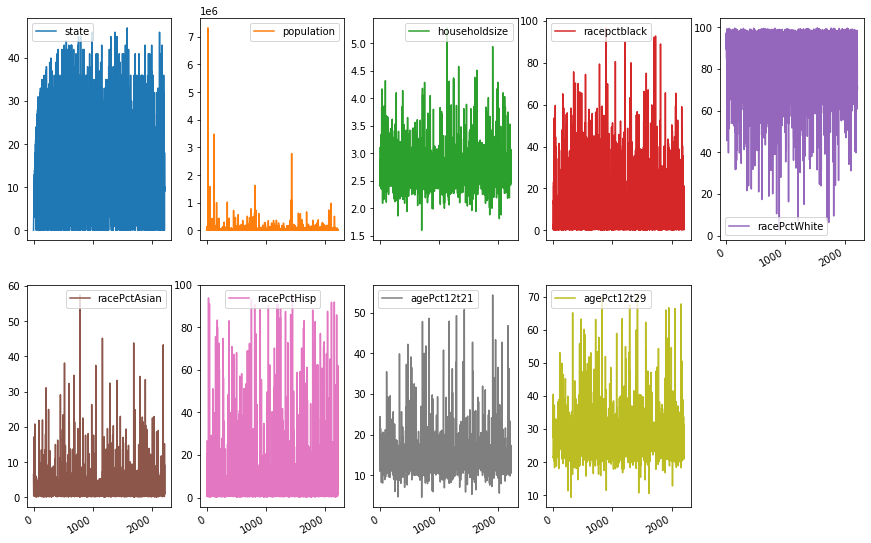

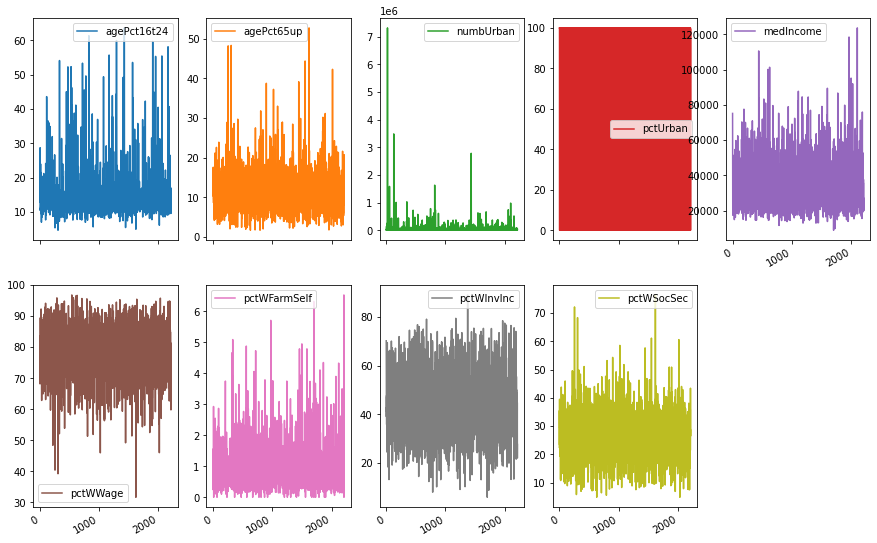

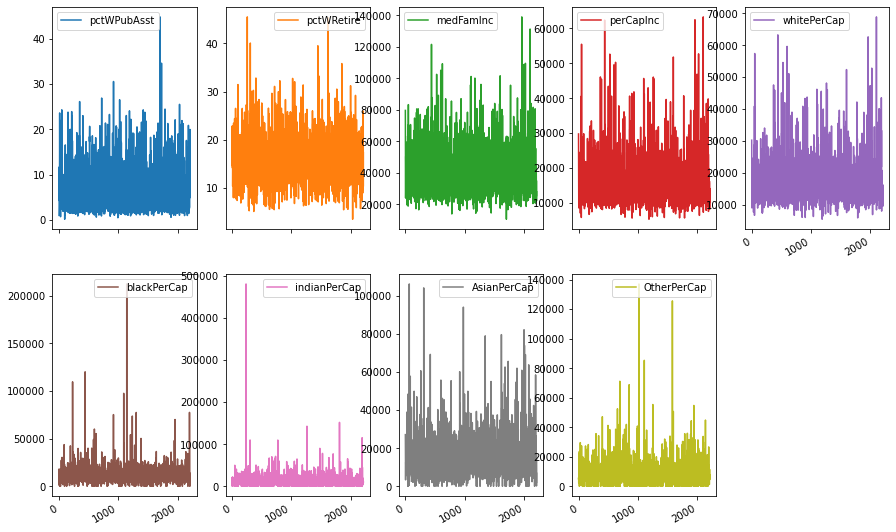

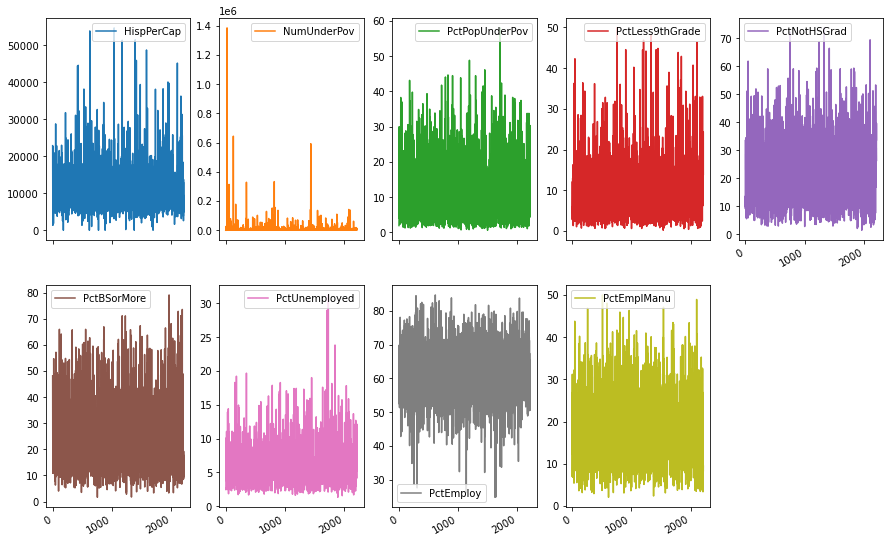

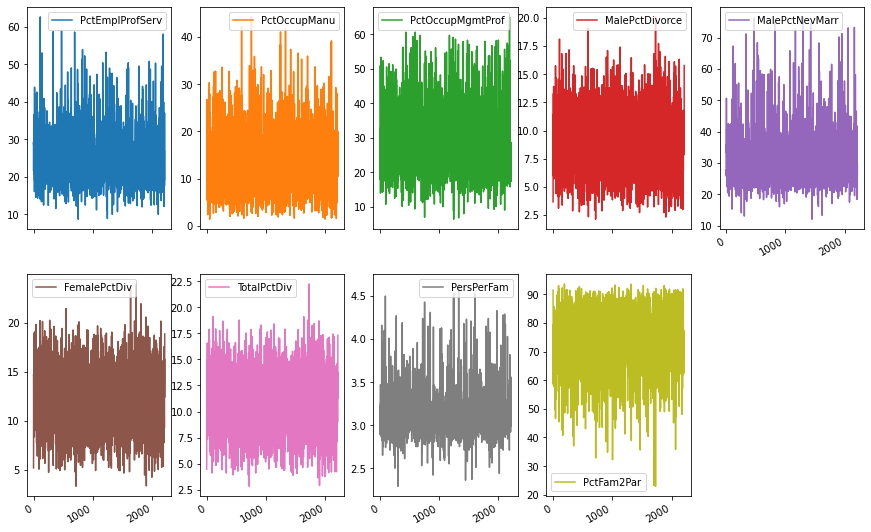

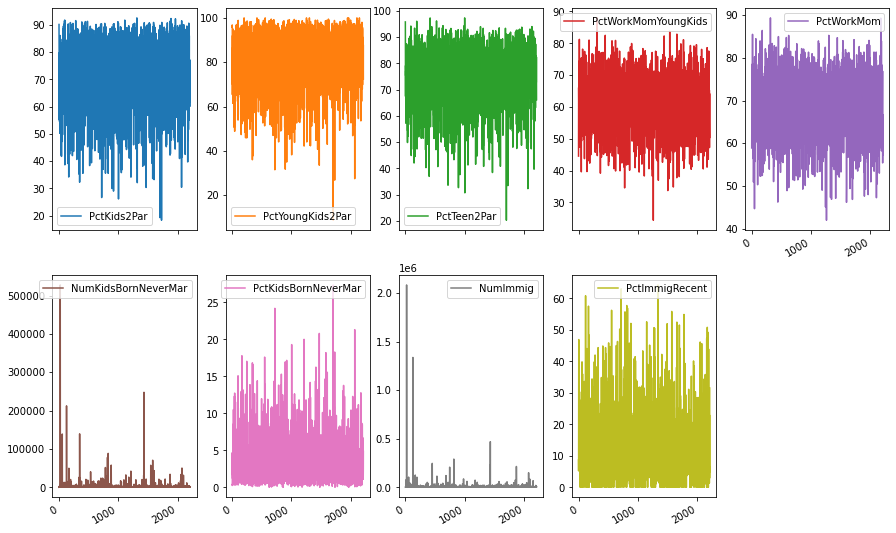

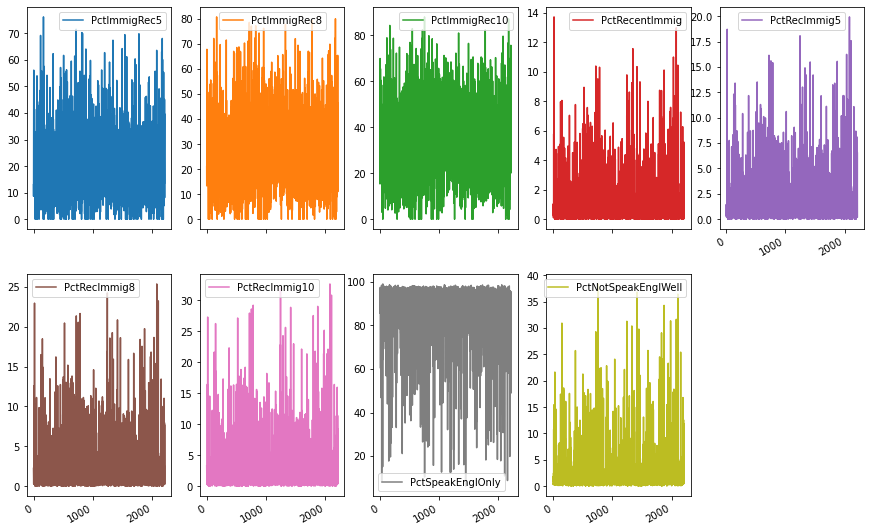

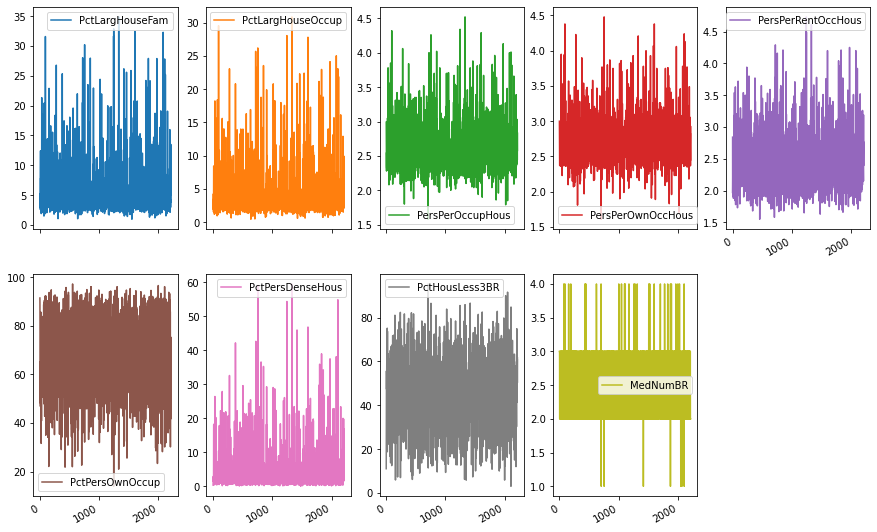

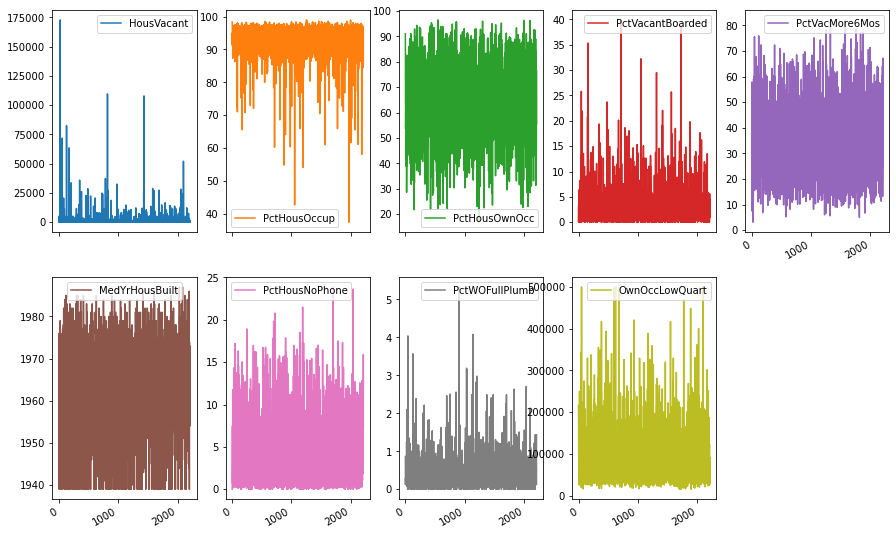

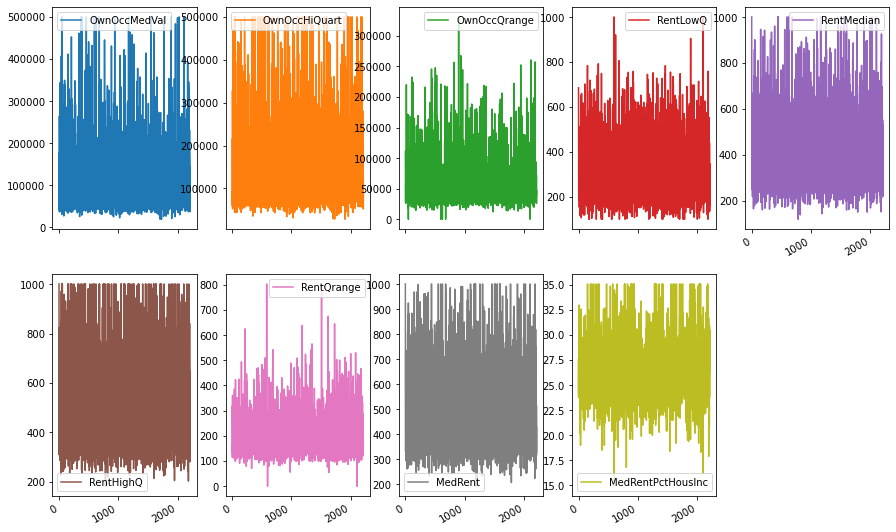

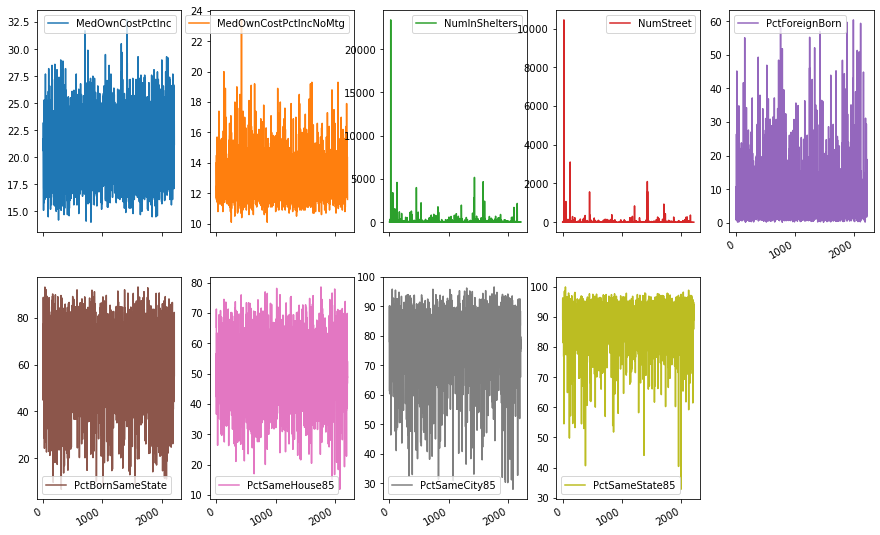

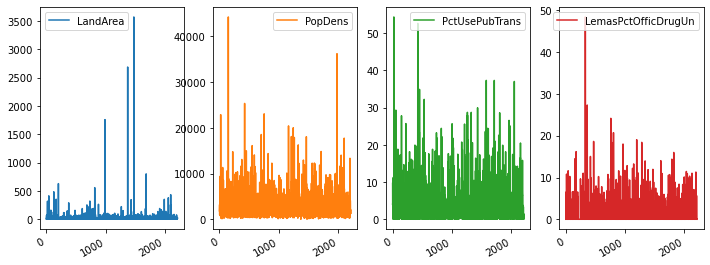

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

count = 0
while count <(len(reindexed_community_df.columns)-1):
    maxNum = count+9
    if maxNum>=(len(reindexed_community_df.columns)):
        maxNum = (len(reindexed_community_df.columns)-1)    
        
    reindexed_community_df.iloc[:,count:maxNum].plot.line(subplots=True, layout=(2,5),figsize=(15,10))
    plt.show()
    count+=9





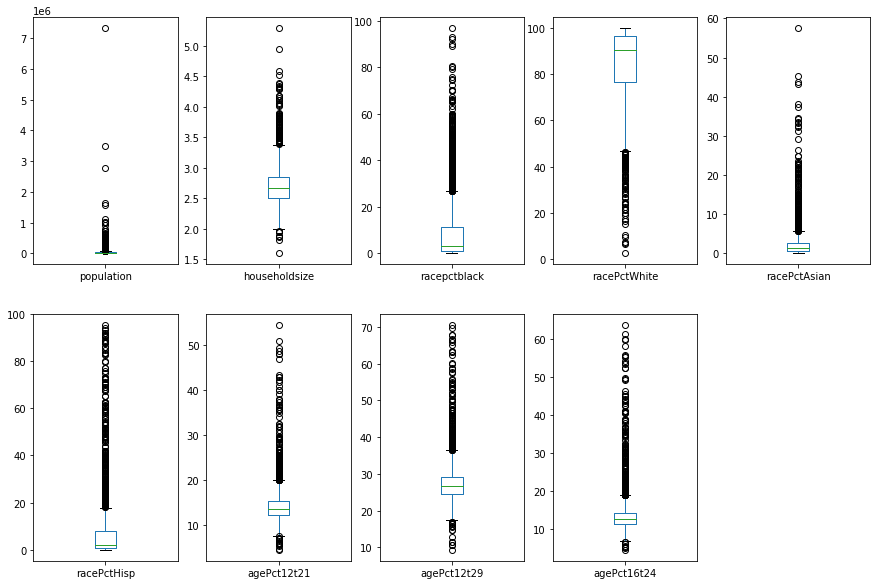

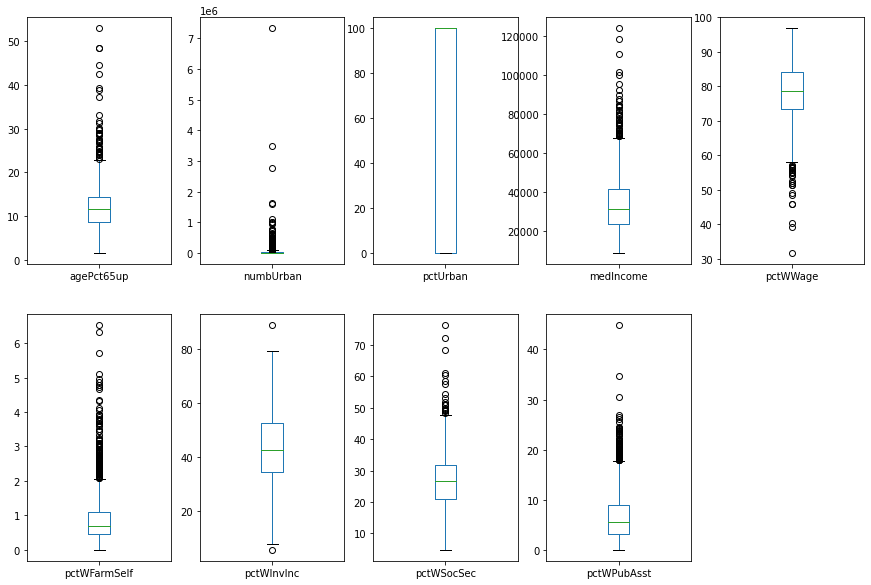

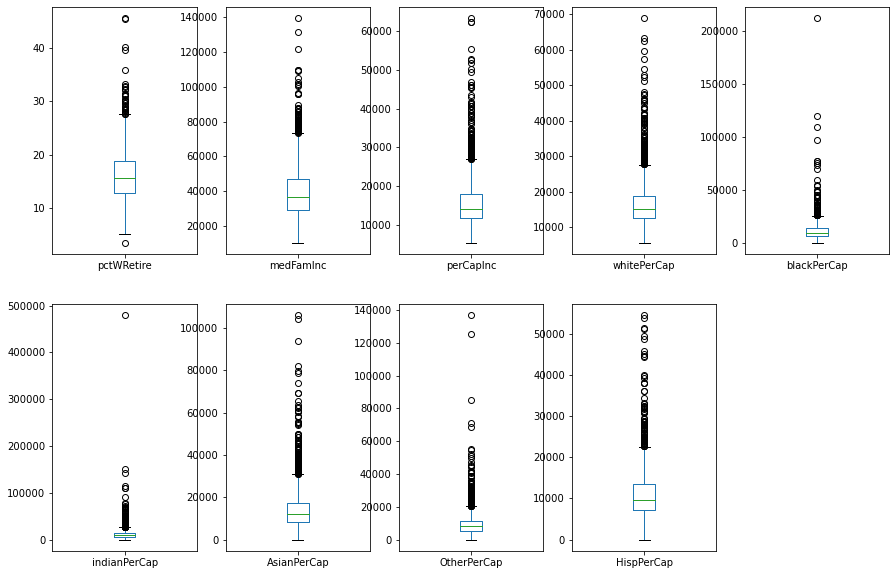

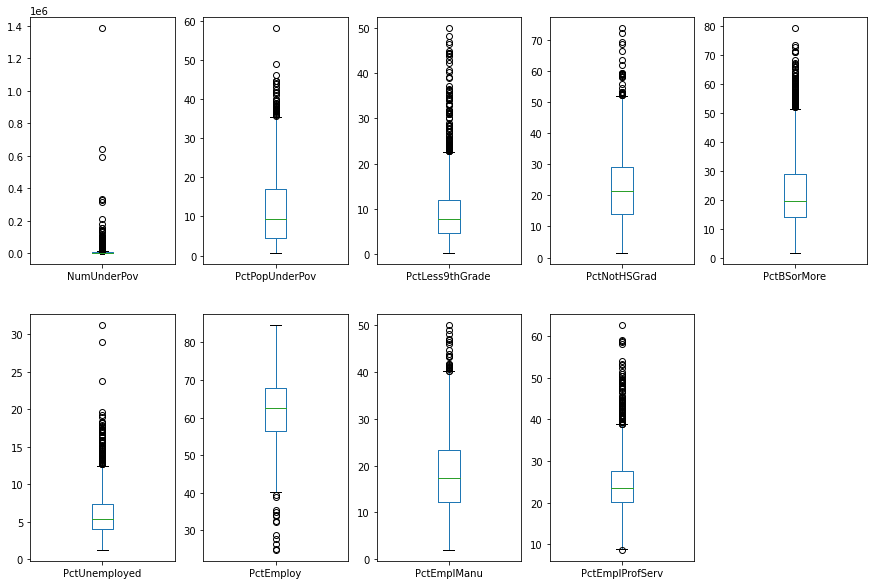

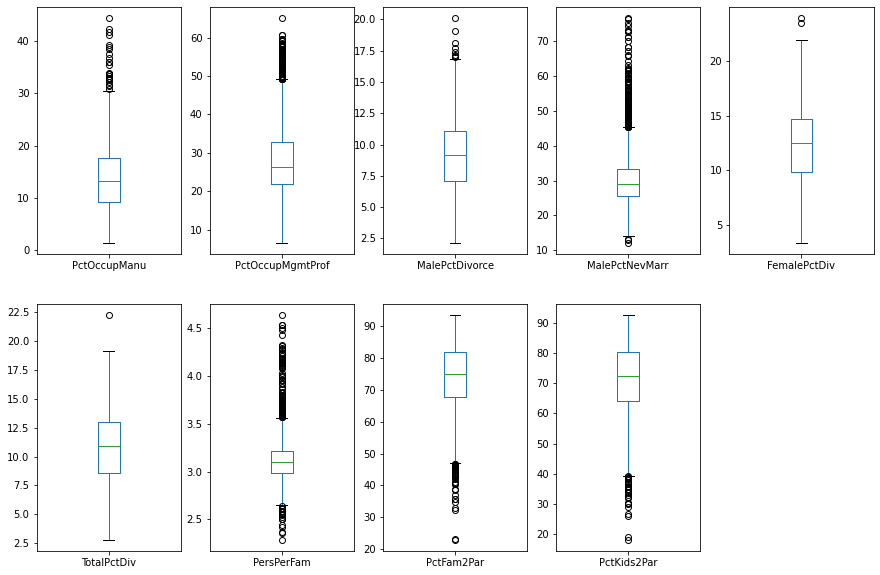

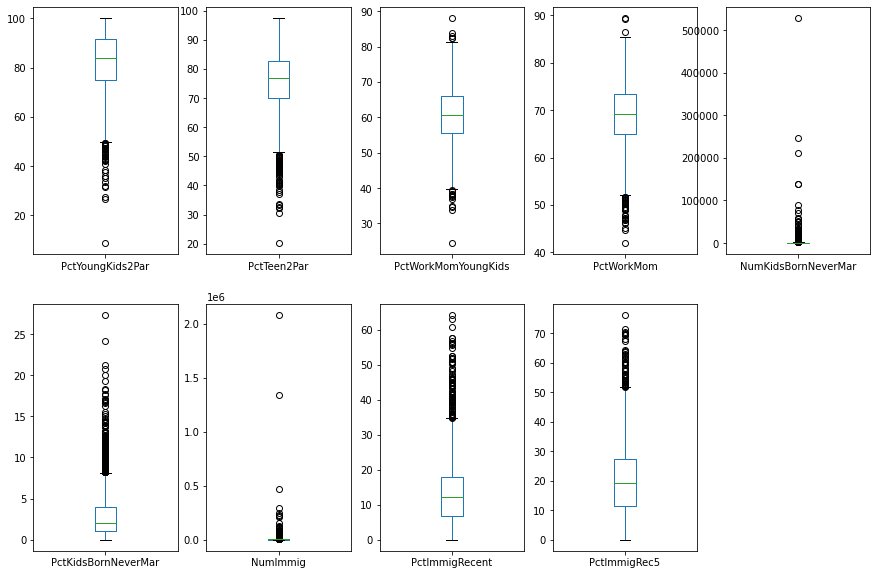

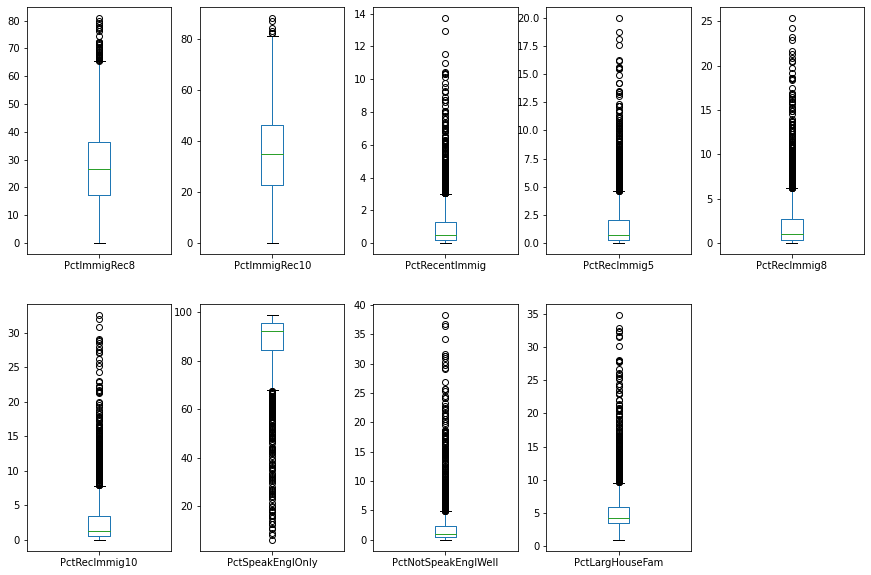

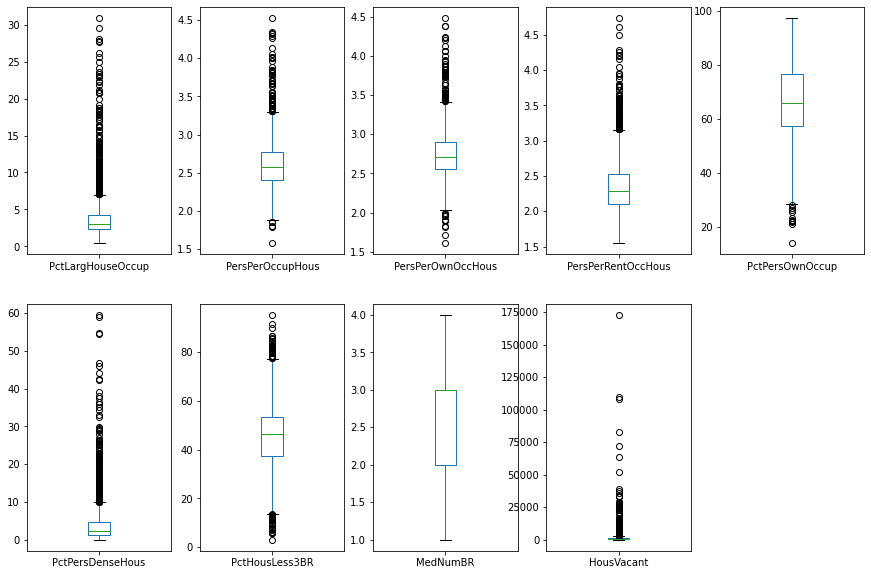

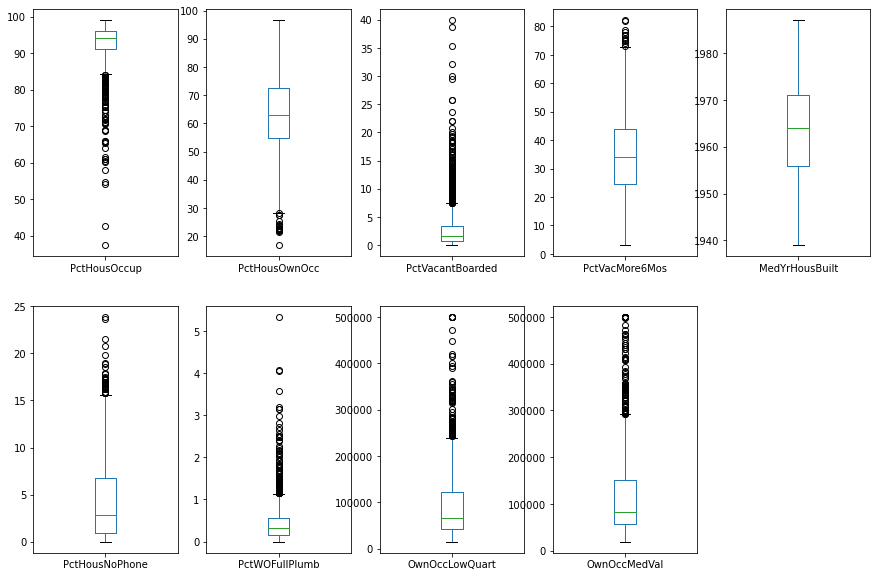

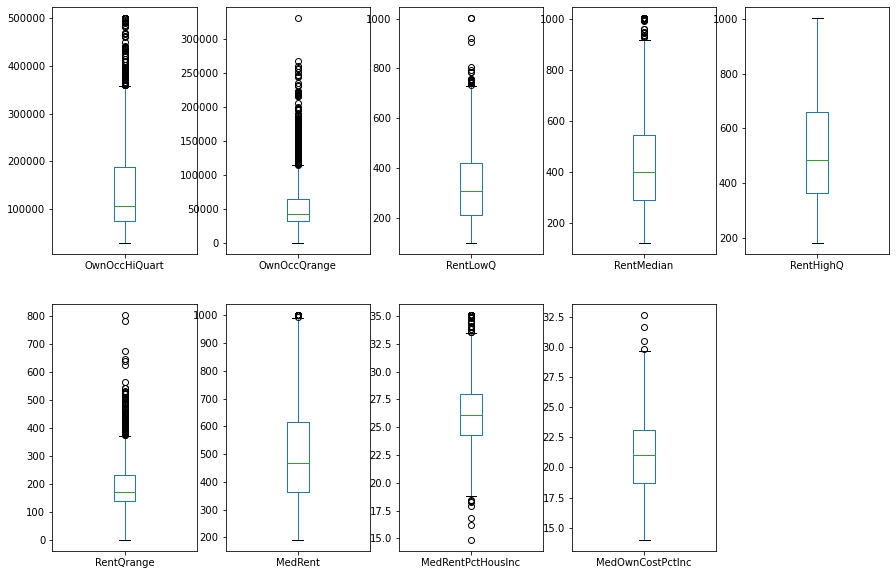

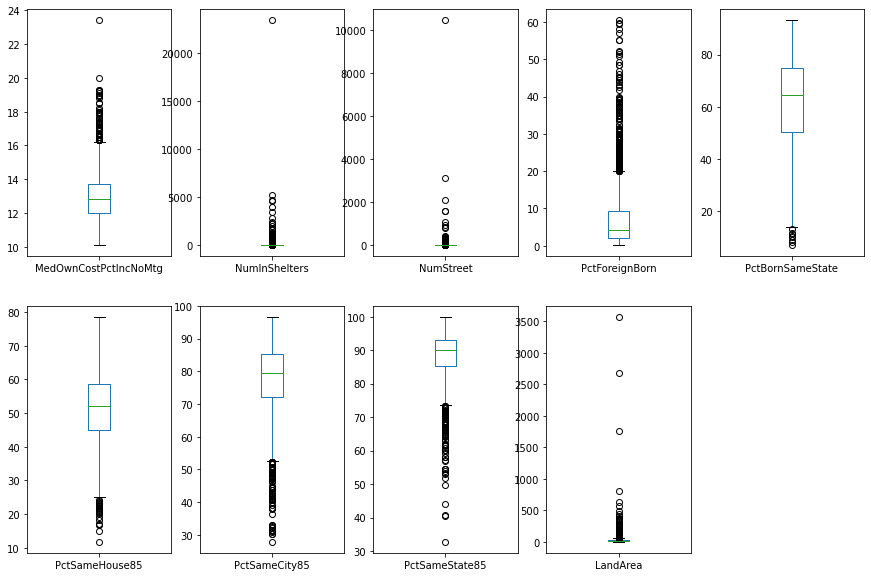

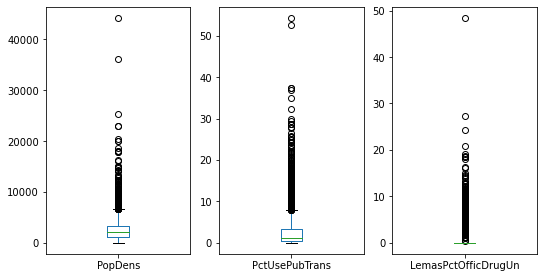

In [29]:
#don't need to look at state for outliers
count = 1
while count <(len(reindexed_community_df.columns)-1):
    maxNum = count+9
    if maxNum>=(len(reindexed_community_df.columns)):
        maxNum = (len(reindexed_community_df.columns)-1)    
        
    reindexed_community_df.iloc[:,count:maxNum].plot.box(subplots=True, layout=(2,5),figsize=(15,10))
    plt.show()
    count+=9

Taking a look at both sets of plots, we can get a sense of our data a lot better. The line graphs show that we do not have a normal distrubtion for any of a specific column. We also see through our box plots that many columns have significant statistical outliers. Many of these outliers can be explained because of the fact that this data set does not encompass every statistically relevant ameerican city (only those that partook in the survey). For instane with the population column we can see an extreme outlier at the top which normally may raise eye brows on if it's a valid data point or not. On further inspection, this data point belongs to the state of New York and more than likely belongs to the city of New York making the popluation point accurate. Some interesting columns that we could look at would be to see how much education levels affect 'murder per pop' or the overall poverty rate.

In [27]:
reindexed_community_df[reindexed_community_df['population'] == reindexed_community_df['population'].max()]

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murdPerPop
21,3,7322564,2.6,28.71,52.26,7.0,24.36,13.06,27.46,13.09,...,28.45,53.09,63.06,82.76,89.78,320.1,22878.2,54.33,6.91,26.59


# Closer Analysis On Specific Columns

The table below showcases the covariance between different columns. The covariance gives us insight to how the rate of change of one column is related to another. As you can see,  murderPerPop has positive covariance with PctPopUnderPov, PctLess9thGrade, PctNotHSGrad,NumberUnderPov, PctUnemployed,NumInShelters, and NumStreet. What we can infer from this is that there may be colleration between poverty + lack of education  to a community's murder rate. It can also be seen that a high median income, 2 parent homes, and obtaining higher education are inversely correlated with murderPerPop which is interesting. 

In [34]:
poverty_df = reindexed_community_df[['murdPerPop','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','NumUnderPov','PctUnemployed','PctFam2Par','NumInShelters','NumStreet','medIncome']]
poverty_df.cov()

,murdPerPop,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,NumUnderPov,PctUnemployed,PctFam2Par,NumInShelters,NumStreet,medIncome
murdPerPop,83.847513,38.033494,19.688273,41.506976,-28.351957,1.020585e+05,12.339569,-59.139249,1.058757e+03,2.852597e+02,-4.239005e+04
PctPopUnderPov,38.033494,73.966059,36.831722,62.797392,-41.390647,5.481664e+04,19.243456,-68.084959,4.091922e+02,1.034469e+02,-8.755934e+04
PctLess9thGrade,19.688273,36.831722,44.444928,67.956634,-48.820905,2.373817e+04,12.684971,-33.354777,1.607270e+02,5.990406e+01,-4.985832e+04
PctNotHSGrad,41.506976,62.797392,67.956634,120.769474,-104.785024,4.635794e+04,23.038859,-71.971662,3.443333e+02,1.042762e+02,-9.893690e+04
PctBSorMore,-28.351957,-41.390647,-48.820905,-104.785024,160.965384,-1.825719e+04,-20.051513,61.428383,-8.283727e+00,-2.493226e+00,1.161727e+05
NumUnderPov,102058.458320,54816.641298,23738.172294,46357.943480,-18257.192889,1.549325e+09,17426.501429,-82906.021591,2.020013e+07,8.478814e+06,-5.350713e+07
PctUnemployed,12.339569,19.243456,12.684971,23.038859,-20.051513,1.742650e+04,8.384605,-20.475901,1.302567e+02,3.731146e+01,-2.389485e+04
PctFam2Par,-59.139249,-68.084959,-33.354777,-71.971662,61.428383,-8.290602e+04,-20.475901,110.795662,-8.690762e+02,-2.126316e+02,1.016661e+05
NumInShelters,1058.757271,409.192234,160.726953,344.333264,-8.283727,2.020013e+07,130.256685,-869.076246,3.183816e+05,1.312067e+05,-3.767247e+05
NumStreet,285.259727,103.446879,59.904055,104.276238,-2.493226,8.478814e+06,37.311459,-212.631559,1.312067e+05,6.024696e+04,-7.921055e+04


<AxesSubplot:>

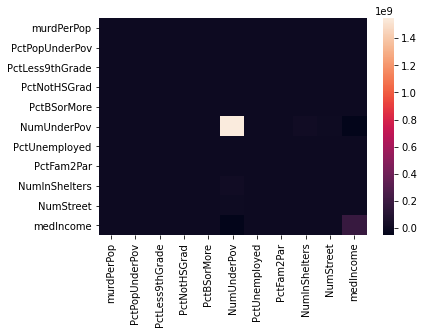

In [38]:
import seaborn as sbs
sbs.heatmap(poverty_df.cov())

Because of the scale differences between the columns, getting meaningfull analysis may be difficult as well as the data itself will lead to bias if thrown into a linear regression model to attempt to predict a communities murderPerPop. It would be in our best interest to normalize the data.

# Data Normalization

In [5]:
from sklearn import preprocessing

x = poverty_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_poverty_df = pd.DataFrame(x_scaled)

#need to reapply the original column names
normalized_poverty_df.columns = poverty_df.columns
print(normalized_poverty_df)


      murdPerPop  PctPopUnderPov  PctLess9thGrade  PctNotHSGrad  PctBSorMore  \
0       0.000000        0.023013         0.112900      0.116898     0.600258   
1       0.000000        0.058229         0.108875      0.169806     0.364410   
2       0.091119        0.071653         0.052324      0.105679     0.367505   
3       0.000000        0.289226         0.218354      0.446260     0.118375   
4       0.000000        0.511681         0.240491      0.299169     0.304965   
...          ...             ...              ...           ...          ...   
2210    0.181030        0.425732         0.340511      0.407341     0.182592   
2211    0.000000        0.351290         0.247736      0.363573     0.227595   
2212    0.149413        0.120642         0.153351      0.341828     0.139136   
2213    0.000000        0.517434         0.486416      0.528670     0.138878   
2214    0.181469        0.311367         0.276313      0.446260     0.093230   

      NumUnderPov  PctUnemployed  PctFa

,murdPerPop,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,NumUnderPov,PctUnemployed,PctFam2Par,NumInShelters,NumStreet,medIncome
murdPerPop,0.010105,0.007279,0.004350,0.006311,-0.004014,0.000809,0.004529,-0.009192,0.000497,0.000300,-0.004055
PctPopUnderPov,0.007279,0.022481,0.012922,0.015163,-0.009305,0.000690,0.011217,-0.016806,0.000305,0.000173,-0.013302
PctLess9thGrade,0.004350,0.012922,0.018000,0.018942,-0.012669,0.000345,0.008535,-0.009504,0.000138,0.000115,-0.008743
PctNotHSGrad,0.006311,0.015163,0.018942,0.023168,-0.018715,0.000464,0.010669,-0.014114,0.000204,0.000138,-0.011941
PctBSorMore,-0.004014,-0.009305,-0.012669,-0.018715,0.026765,-0.000170,-0.008645,0.011215,-0.000005,-0.000003,0.013054
NumUnderPov,0.000809,0.000690,0.000345,0.000464,-0.000170,0.000808,0.000421,-0.000848,0.000624,0.000586,-0.000337
PctUnemployed,0.004529,0.011217,0.008535,0.010669,-0.008645,0.000421,0.009372,-0.009693,0.000186,0.000119,-0.006961
PctFam2Par,-0.009192,-0.016806,-0.009504,-0.014114,0.011215,-0.000848,-0.009693,0.022210,-0.000526,-0.000288,0.012543
NumInShelters,0.000497,0.000305,0.000138,0.000204,-0.000005,0.000624,0.000186,-0.000526,0.000582,0.000537,-0.000140
NumStreet,0.000300,0.000173,0.000115,0.000138,-0.000003,0.000586,0.000119,-0.000288,0.000537,0.000552,-0.000066


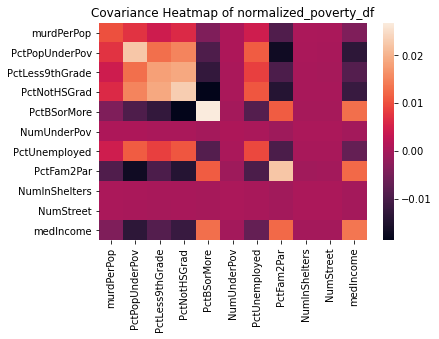

In [17]:
sbs.heatmap(normalized_poverty_df.cov()).set_title('Covariance Heatmap of normalized_poverty_df')
normalized_poverty_df.cov()


In [18]:
normalized_poverty_df.corr(method ='pearson')


,murdPerPop,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,NumUnderPov,PctUnemployed,PctFam2Par,NumInShelters,NumStreet,medIncome
murdPerPop,1.000000,0.482953,0.322516,0.412475,-0.244046,0.283161,0.465386,-0.613577,0.204917,0.126919,-0.344838
PctPopUnderPov,0.482953,1.000000,0.642384,0.664426,-0.379332,0.161929,0.772726,-0.752096,0.084321,0.049004,-0.758372
PctLess9thGrade,0.322516,0.642384,1.000000,0.927560,-0.577203,0.090462,0.657108,-0.475319,0.042727,0.036608,-0.557086
PctNotHSGrad,0.412475,0.664426,0.927560,1.000000,-0.751544,0.107170,0.724004,-0.622188,0.055530,0.038658,-0.670619
PctBSorMore,-0.244046,-0.379332,-0.577203,-0.751544,1.000000,-0.036559,-0.545808,0.459983,-0.001157,-0.000801,0.682077
NumUnderPov,0.283161,0.161929,0.090462,0.107170,-0.036559,1.000000,0.152897,-0.200103,0.909513,0.877599,-0.101260
PctUnemployed,0.465386,0.772726,0.657108,0.724004,-0.545808,0.152897,1.000000,-0.671801,0.079723,0.052497,-0.614694
PctFam2Par,-0.613577,-0.752096,-0.475319,-0.622188,0.459983,-0.200103,-0.671801,1.000000,-0.146326,-0.082300,0.719467
NumInShelters,0.204917,0.084321,0.042727,0.055530,-0.001157,0.909513,0.079723,-0.146326,1.000000,0.947359,-0.049733
NumStreet,0.126919,0.049004,0.036608,0.038658,-0.000801,0.877599,0.052497,-0.082300,0.947359,1.000000,-0.024039


Text(0.5, 1.0, 'Correlation Heatmap of normalized_poverty_df')

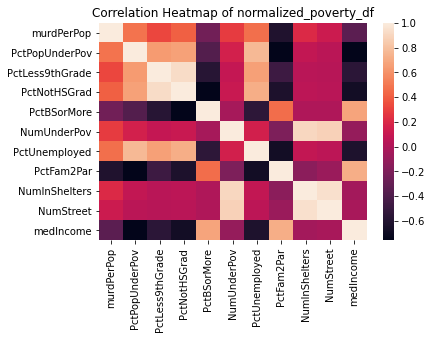

In [19]:
sbs.heatmap(normalized_poverty_df.corr()).set_title('Correlation Heatmap of normalized_poverty_df')

Using the correlation values, alot of information comes to light. Keep in mind that crime (specifically murder) has many socio-economic variables to contribute to the increase in murder. Normally, we would consider values of 0.8 or -0.8 to be statistically significant however in this case we can make an exception.

PctPopUnderPov: 0.482953
PctNotHSGrad: 0.412475
PctUnemployed: 0.465386

These three columns have above an 0.4 correlation with murdPerPop. Along with understanding that not a single variable is solely responsible or influence, we can confidently say that a high precentage of community that is under the poverty line, a high precentage of the popluation that did not complete at least highschool, and high precentage of unemployment these 3 are postively correlated to murder rate of a community.

PctFam2Par: -0.613577	
medIncome: -0.344838
Meanwhile we can also say that two parents house  holds and higher medium incomes are negatively correlated with murder rate per population.


# Linear regression to predict murder rate in the community based on poverty 

In [38]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

dep_var = normalized_poverty_df[['murdPerPop']]

ind_var = normalized_poverty_df.loc[:, normalized_poverty_df.columns != 'murdPerPop']

x_train, x_test,y_train,y_test = train_test_split(dep_var,ind_var,test_size =0.2)
                                                  
#create the linear regression model object
regr = linear_model.LinearRegression()

regr.fit(x_train,y_train)

y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test,y_pred))
                                      
                                                 
                                                  


Coefficients: 
 [[ 0.72662312]
 [ 0.43845409]
 [ 0.63432354]
 [-0.40121384]
 [ 0.09282633]
 [ 0.45245318]
 [-0.90692898]
 [ 0.0582067 ]
 [ 0.03430248]
 [-0.40193966]]
Mean squared error: 0.01
Coefficient of determination: 0.06


# Conclusion

Using a simple linear regression, we can see the out of trying to predict murder rate using the selected features. a 6% accuracy rate is to be expected as poverty itself is not the driving factor. There are simply to many socio-economic factors that play into this, and our data does not explore every single factor that places into this complex social issue.  What we are able to conlcude from this is that poverty DOES play a statistically significant role, and is an issue that needs to be address if we wan't to decrease the murder rate in specific communities.

In [41]:
import dill
#save the session of the jupyter notebook to a file
dill.dump_session('community_final_env.db')


In [1]:
import dill
dill.load_session('community_final_env.db')